<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.835058,58.708604,75.761319,0.000004,185.304986,185.305035,-0.000049
1,0.0,1.0,76.372165,86.064286,57.609713,-0.000012,230.046152,230.046121,0.000031
2,0.0,2.0,39.354317,59.720925,48.222672,-0.000037,157.297877,157.297948,-0.000071
3,0.0,3.0,65.700672,38.372356,99.460227,-0.000186,213.533070,213.533363,-0.000293
4,0.0,4.0,92.183128,77.742463,79.311943,-0.000013,259.237520,259.237517,0.000004
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,58.572565,86.830128,38.581518,0.000003,193.984215,193.984220,-0.000005
119996,999.0,116.0,66.077174,58.243536,66.567997,-0.000046,200.888661,200.888712,-0.000051
119997,999.0,117.0,43.358532,90.055872,30.416226,-0.000020,173.830610,173.830640,-0.000030
119998,999.0,118.0,90.795176,60.545046,65.595622,0.000063,226.935907,226.935850,0.000057


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.835058  58.708604  75.761319  ...  185.304986  185.305035 -0.000049
      1.0    76.372165  86.064286  57.609713  ...  230.046152  230.046121  0.000031
      2.0    39.354317  59.720925  48.222672  ...  157.297877  157.297948 -0.000071
      3.0    65.700672  38.372356  99.460227  ...  213.533070  213.533363 -0.000293
      4.0    92.183128  77.742463  79.311943  ...  259.237520  259.237517  0.000004
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  58.572565  86.830128  38.581518  ...  193.984215  193.984220 -0.000005
      116.0  66.077174  58.243536  66.567997  ...  200.888661  200.888712 -0.000051
      117.0  43.358532  90.055872  30.416226  ...  173.830610  173.830640 -0.000030
      118.0  90.795176  60.545046  65.595622  ...  226.935907  226.935850  0.000057
      119.0  88.612328  99.460096  86.172215  ...  284.244662  284.244631  0.000031

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.835058  58.708604  75.761319  ...  185.304986  185.305035 -0.000049
      1.0    76.372165  86.064286  57.609713  ...  230.046152  230.046121  0.000031
      2.0    39.354317  59.720925  48.222672  ...  157.297877  157.297948 -0.000071
      3.0    65.700672  38.372356  99.460227  ...  213.533070  213.533363 -0.000293
      4.0    92.183128  77.742463  79.311943  ...  259.237520  259.237517  0.000004
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  58.572565  86.830128  38.581518  ...  193.984215  193.984220 -0.000005
      116.0  66.077174  58.243536  66.567997  ...  200.888661  200.888712 -0.000051
      117.0  43.358532  90.055872  30.416226  ...  173.830610  173.830640 -0.000030
      118.0  90.795176  60.545046  65.595622  ...  226.935907  226.935850  0.000057
      119.0  88.612328  99.460096  86.172215  ...  284.244662  284.244631  0.000031

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.835058,58.708604,75.761319,0.000004,185.304986,185.305035,-0.000049
1,0.0,1.0,76.372165,86.064286,57.609713,-0.000012,230.046152,230.046121,0.000031
2,0.0,2.0,39.354317,59.720925,48.222672,-0.000037,157.297877,157.297948,-0.000071
3,0.0,3.0,65.700672,38.372356,99.460227,-0.000186,213.533070,213.533363,-0.000293
4,0.0,4.0,92.183128,77.742463,79.311943,-0.000013,259.237520,259.237517,0.000004
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,58.572565,86.830128,38.581518,0.000003,193.984215,193.984220,-0.000005
119996,999.0,116.0,66.077174,58.243536,66.567997,-0.000046,200.888661,200.888712,-0.000051
119997,999.0,117.0,43.358532,90.055872,30.416226,-0.000020,173.830610,173.830640,-0.000030
119998,999.0,118.0,90.795176,60.545046,65.595622,0.000063,226.935907,226.935850,0.000057


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.835058  58.708604  75.761319  ...  185.304986  185.305035 -0.000049
      1.0    76.372165  86.064286  57.609713  ...  230.046152  230.046121  0.000031
      2.0    39.354317  59.720925  48.222672  ...  157.297877  157.297948 -0.000071
      3.0    65.700672  38.372356  99.460227  ...  213.533070  213.533363 -0.000293
      4.0    92.183128  77.742463  79.311943  ...  259.237520  259.237517  0.000004
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  58.572565  86.830128  38.581518  ...  193.984215  193.984220 -0.000005
      116.0  66.077174  58.243536  66.567997  ...  200.888661  200.888712 -0.000051
      117.0  43.358532  90.055872  30.416226  ...  173.830610  173.830640 -0.000030
      118.0  90.795176  60.545046  65.595622  ...  226.935907  226.935850  0.000057
      119.0  88.612328  99.460096  86.172215  ...  284.244662  284.244631  0.000031

[120000 rows x 7 columns]

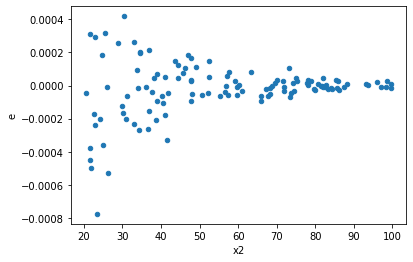

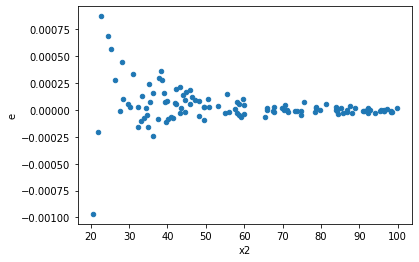

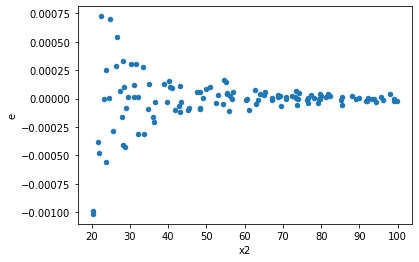

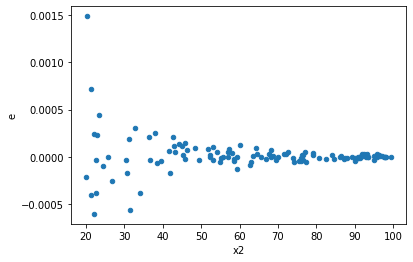

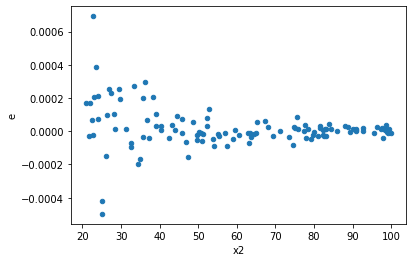

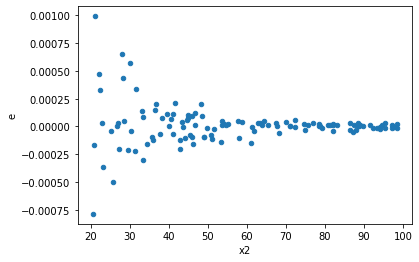

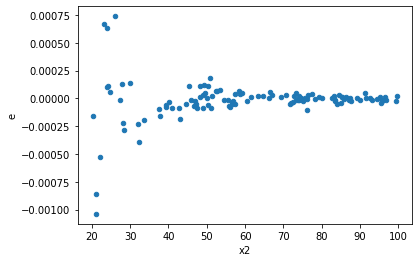

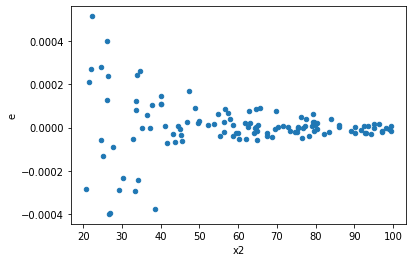

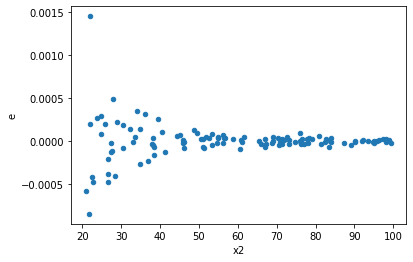

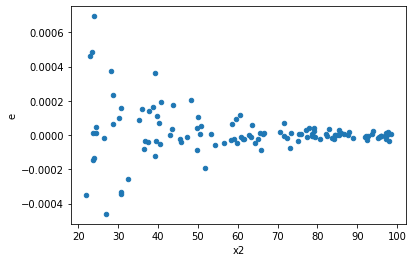

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
3.0,44.0,70.0,5.147531036599986e-07,2.7627796898547307e-06,1.1971002410697642e-08,4.004028536021349e-08,3.3736647028109368,3.615867324047173e-05,0.9999819206633798,Reject005=0 : Heteroscedasticity
4.0,53.0,61.0,5.395186874577929e-07,8.328533863383816e-07,1.0375359374188326e-08,1.388088977230636e-08,1.3412449458052245,0.2762348560318606,0.8618825719840697,Reject005=1 : Homoscedasticity
8.0,50.0,64.0,9.307694472687318e-07,1.9067637611339496e-06,1.8995294842219014e-08,3.0266091446570626e-08,1.600459912771292,0.08563061842256703,0.9571846907887165,Reject005=1 : Homoscedasticity
9.0,50.0,64.0,8.511726480218272e-07,3.11602357587717e-06,1.737087036779239e-08,4.946069168059e-08,2.8600465772857078,0.00017751000482335577,0.9999112449975883,Reject005=0 : Heteroscedasticity
10.0,54.0,60.0,7.632785683857662e-08,2.7609791553032266e-06,1.4401482422372947e-09,4.6796256869546216e-08,32.555365009502374,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
11.0,55.0,59.0,9.233247823107731e-07,2.509622259706071e-06,1.7098607079829133e-08,4.3269349305277084e-08,2.5337545601637252,0.000645834546621149,0.9996770827266894,Reject005=0 : Heteroscedasticity
14.0,65.0,49.0,7.68204078382849e-08,1.6601405585374203e-06,1.2003188724732016e-09,3.458626163619626e-08,28.667216609486804,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
15.0,50.0,64.0,1.3936134646168532e-06,2.576845729984561e-06,2.844109111462966e-08,4.090231317435811e-08,1.4445617652696239,0.17797609936743886,0.9110119503162806,Reject005=1 : Homoscedasticity
16.0,67.0,47.0,2.151767161589992e-06,1.8948704114771413e-06,3.2602532751363515e-08,4.119283503211177e-08,1.2553394690493769,0.3887540055081231,0.8056229972459384,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,56.0,58.0,4.871272324244442e-06,9.482166707331955e-08,8.856858771353531e-08,1.6635380188301676e-09,0.018794259142516534,1.2498913258878932e-34,Reject005=0 : Heteroscedasticity
1.0,58.0,56.0,2.28487655706653e-06,1.6657317279976852e-06,4.0085553632746144e-08,3.028603141813973e-08,0.7550614240051966,0.2929608895093962,Reject005=1 : Homoscedasticity
2.0,49.0,65.0,1.2716453424030733e-06,1.5627287723764346e-06,2.6492611300064028e-08,2.441763706838179e-08,0.9264037977243567,0.7660996593787337,Reject005=1 : Homoscedasticity
3.0,44.0,70.0,5.147531036599986e-07,2.7627796898547307e-06,1.1971002410697642e-08,4.004028536021349e-08,3.3736647028109368,3.615867324047173e-05,Reject005=0 : Heteroscedasticity
4.0,53.0,61.0,5.395186874577929e-07,8.328533863383816e-07,1.0375359374188326e-08,1.388088977230636e-08,1.3412449458052245,0.2762348560318606,Reject005=1 : Homoscedasticity
5.0,67.0,47.0,1.310164873639078e-06,2.3382076026805132e-07,1.9850982933925423e-08,5.083060005827203e-09,0.2544099317828442,2.554224788104128e-06,Reject005=0 : Heteroscedasticity
6.0,67.0,47.0,2.5946592421466486e-06,6.142867454310693e-07,3.931301882040377e-08,1.3354059683284117e-08,0.3374953235799998,0.00014485666903495172,Reject005=0 : Heteroscedasticity
7.0,59.0,55.0,1.8006592265155304e-06,1.984332186479073e-07,3.1045848733026386e-08,3.6746892342205054e-09,0.11821488615065737,2.2316612285103271e-13,Reject005=0 : Heteroscedasticity
8.0,50.0,64.0,9.307694472687318e-07,1.9067637611339496e-06,1.8995294842219014e-08,3.0266091446570626e-08,1.600459912771292,0.08563061842256703,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    725
Reject005=1 : Homoscedasticity      275
Name: Result_test, dtype: int64